<h1 style='text-align: center'><strong>Polynomial regression</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Predicting house prices</strong></h2>

<h4 style='text-align: center'>Boston housing dataset</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#Features">Features</a></li>
        <li><a href="#Splitting-the-dataset">Splitting the dataset</a></li>
        <li><a href="#Polynomial-regression-model">Polynomial regression model</a></li>
        <li><a href="#Predictions">Predictions</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).

The polynomial regression model is given by:

$$y = b_0 + b_1x + b_2x^2 + b_3x^3 + ... + b_nx^n$$

Where:
- $y$ is the dependent variable.
- $x$ is the independent variable.
- $b_0, b_1, b_2, ..., b_n$ are the coefficients.

<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Import necessary libraries
- **train_test_split from sklearn.model_selection**: To split the dataset into training and testing sets.
- **PolynomialFeatures from sklearn.preprocessing**: To create polynomial features.
- **LinearRegression from sklearn.linear_model**: To create and train the polynomial regression model.
- **matplotlib.pyplot**: For plotting the results.
- **fetch_openml from sklearn.datasets**: To fetch the dataset.
- **mean_absolute_error, mean_squared_error, r2_score from sklearn.metrics**: To evaluate the model's performance.


<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>

In [2]:
# Load the Boston housing dataset
boston = fetch_openml(name="boston", as_frame=True, version=1)
df = boston.data
df['MEDV'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Load the dataset
- **fetch_openml(name="boston", as_frame=True, version=1)**: Fetches the Boston housing dataset from OpenML and loads it as a DataFrame.
- **df = boston.data**: Contains the features of the dataset.
- **df['MEDV'] = boston.target**: Adds the target variable (`MEDV`) to the DataFrame.


<h2 style='text-align: center' id='Features'><strong>4. Features</strong></h2>

In [3]:
# Select the features and target variable
X = df[['LSTAT']]  # Using percentage of lower status of the population as the feature
y = df['MEDV']

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

### Select the features and target variable
- **X = df[['LSTAT']]**: Selects the 'LSTAT' (percentage of lower status population) as the feature for the model.
- **y = df['MEDV']**: Selects the 'MEDV' (median value of owner-occupied homes in $1000's) as the target variable.

### Create polynomial features
- **poly = PolynomialFeatures(degree=3)**: Initializes the polynomial features transformer with a degree of 3.
- **X_poly = poly.fit_transform(X)**: Transforms the feature `X` into polynomial features.

<h2 style='text-align: center' id='Splitting-the-dataset'><strong>5. Splitting the dataset</strong></h2>

In [4]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

### Split the data into training and testing sets
- **train_test_split(X_poly, y, test_size=0.2, random_state=42)**: Splits the data into training and testing sets. 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
- **test_size=0.2**: Specifies that 20% of the data should be used for testing.
- **random_state=42**: Ensures reproducibility by setting a random seed.


<h2 style='text-align: center' id='Polynomial-regression-model'><strong>6. Polynomial regression model</strong></h2>

In [5]:
# Create and train the Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Create and train the Polynomial Regression model
- **model = LinearRegression()**: Initializes the linear regression model.
- **model.fit(X_train, y_train)**: Trains the model using the training data (`X_train` and `y_train`).


<h2 style='text-align: center' id='Predictions'><strong>7. Predictions</strong></h2>

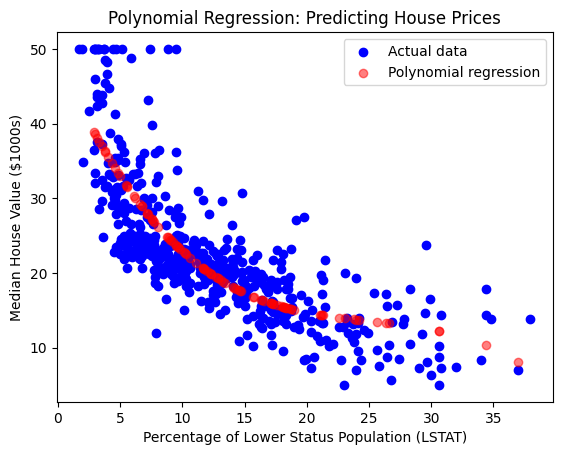

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X['LSTAT'], y, color='blue', label='Actual data')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Polynomial regression', alpha=0.5)
plt.xlabel('Percentage of Lower Status Population (LSTAT)')
plt.ylabel('Median House Value ($1000s)')
plt.legend()
plt.title('Polynomial Regression: Predicting House Prices')
plt.show()

### Plot the results
- **plt.scatter(X['LSTAT'], y, color='blue', label='Actual data')**: Creates a scatter plot of the actual data with 'LSTAT' on the x-axis and 'MEDV' on the y-axis. Points are colored blue.
- **plt.scatter(X_test[:, 1], y_pred, color='red', label='Polynomial regression', alpha=0.5)**: Creates a scatter plot of the predicted values on the testing data. Points are colored red.
- **plt.xlabel('Percentage of Lower Status Population (LSTAT)')**: Sets the x-axis label.
- **plt.ylabel('Median House Value ($1000s)')**: Sets the y-axis label.
- **plt.legend()**: Adds a legend to the plot.
- **plt.title('Polynomial Regression: Predicting House Prices')**: Sets the title of the plot.
- **plt.show()**: Displays the plot.


<h2 style='text-align: center' id='Evaluation'><strong>8. Evaluation</strong></h2>

In [7]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 3.517134059377078
Mean Squared Error (MSE): 25.284048958980637
R-squared (R²): 0.6552196290800323


### Evaluation
- **mean_absolute_error(y_test, y_pred)**: Calculates the Mean Absolute Error (MAE) between the actual and predicted values.
- **mean_squared_error(y_test, y_pred)**: Calculates the Mean Squared Error (MSE) between the actual and predicted values.
- **r2_score(y_test, y_pred)**: Calculates the R-squared (R²) score, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
- **mae**: Prints the Mean Absolute Error.
- **mse**: Prints the Mean Squared Error.
- **r2**: Prints the R-squared score.
